 # K Nearest Neighbor Model (sans scaler)
 ## a.k.a. really lazy learner...
 ### ... to predict candidate "exoplanets"

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
from sklearn.neighbors import KNeighborsClassifier


In [11]:
df = pd.read_csv("exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# # Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


In [12]:
df.koi_disposition[df.koi_disposition == 'CANDIDATE'] = 1
df.koi_disposition[df.koi_disposition == 'FALSE POSITIVE'] = 0
df.koi_disposition[df.koi_disposition == 'CONFIRMED'] = 0
df2 = df.koi_disposition.astype(float)
df2

/Users/pest/anaconda3/envs/PythonData=3.6/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/pest/anaconda3/envs/PythonData=3.6/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/pest/anaconda3/envs/PythonData=3.6/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
6986    0.0
6987    0.0
6988    1.0
6989    0.0
6990    0.0
Name: koi_disposition, Length: 6991, dtype: float64

In [13]:
data = df.drop("koi_disposition", axis=1)
target = df2
print(data.shape, target.shape)
target.dtype

(6991, 40) (6991,)


dtype('float64')

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=1)
X_train.head()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
3563,0,0,0,0,10.548413,5.470000e-05,-5.470000e-05,139.064020,0.004110,-0.004110,...,-133,4.387,0.066,-0.123,1.092,0.181,-0.097,298.09543,44.737061,13.204
4099,0,0,0,0,24.754385,1.365000e-04,-1.365000e-04,140.207320,0.004460,-0.004460,...,-144,4.519,0.078,-0.052,0.804,0.056,-0.076,295.73535,42.576248,15.514
5460,0,0,0,0,1.057336,1.230000e-07,-1.230000e-07,131.792007,0.000096,-0.000096,...,-140,4.594,0.054,-0.027,0.683,0.054,-0.060,292.18417,49.310040,15.414
1091,0,0,0,0,201.118319,1.461000e-03,-1.461000e-03,187.569860,0.005290,-0.005290,...,-112,4.447,0.072,-0.108,0.954,0.135,-0.083,283.11377,48.131390,13.328
5999,0,0,0,0,91.649983,3.181000e-03,-3.181000e-03,175.715600,0.028600,-0.028600,...,-233,4.145,0.164,-0.164,1.608,0.905,-0.383,294.93198,39.812420,12.964


In [15]:
train_scores = []
test_scores = []
for k in range(1,40,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
 

k: 1, Train/Test Score: 1.000/0.701
k: 3, Train/Test Score: 0.844/0.725
k: 5, Train/Test Score: 0.819/0.726
k: 7, Train/Test Score: 0.799/0.743
k: 9, Train/Test Score: 0.795/0.751
k: 11, Train/Test Score: 0.790/0.753
k: 13, Train/Test Score: 0.786/0.745
k: 15, Train/Test Score: 0.783/0.752
k: 17, Train/Test Score: 0.779/0.752
k: 19, Train/Test Score: 0.782/0.756
k: 21, Train/Test Score: 0.776/0.758
k: 23, Train/Test Score: 0.776/0.759
k: 25, Train/Test Score: 0.771/0.760
k: 27, Train/Test Score: 0.775/0.762
k: 29, Train/Test Score: 0.770/0.765
k: 31, Train/Test Score: 0.769/0.764
k: 33, Train/Test Score: 0.767/0.763
k: 35, Train/Test Score: 0.767/0.761
k: 37, Train/Test Score: 0.767/0.760
k: 39, Train/Test Score: 0.766/0.761


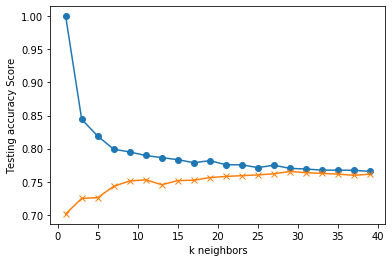

In [16]:
import matplotlib.pyplot as plt
plt.plot(range(1,40,2), train_scores, marker='o')
plt.plot(range(1,40,2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [17]:
# Note that k: 33 provides the best accuracy where the classifier starts to stablize
knn = KNeighborsClassifier(n_neighbors=57)
knn.fit(X_train, y_train)
print('k=33 Test Acc: %.3f' % knn.score(X_test, y_test))

k=33 Test Acc: 0.768
